## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

import warnings
warnings.filterwarnings('ignore')

## Data loading

In [2]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


## Exploratory Data Analysis (EDA)

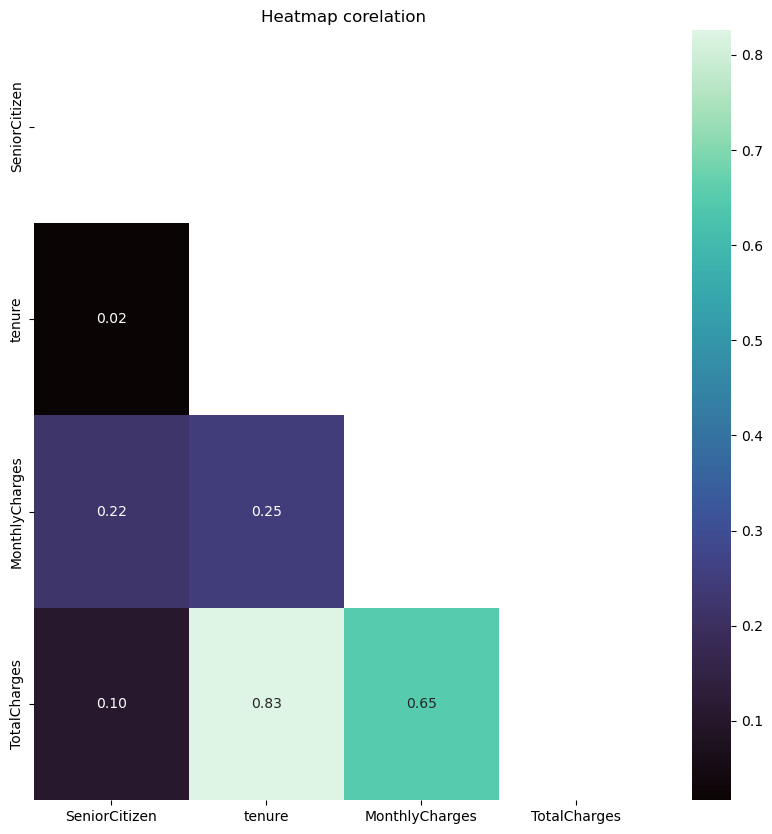

In [7]:
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='mako')
plt.title('Heatmap corelation')
plt.show()

In [8]:
Churn = df.groupby(['Churn'])[['Churn']].count()
Churn

,Churn
Churn,
No,5174
Yes,1869


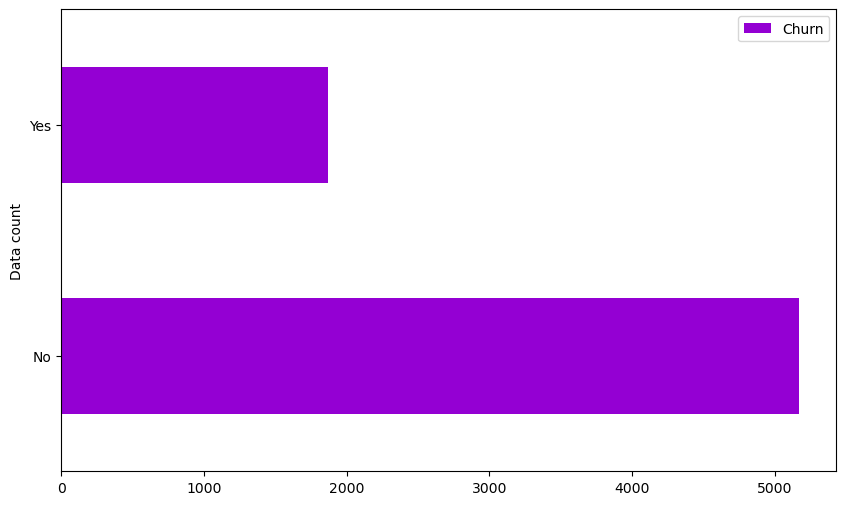

In [9]:
Churn.plot(kind='barh', figsize=(10,6), color='darkviolet')
plt.ylabel('Data count')
plt.show()

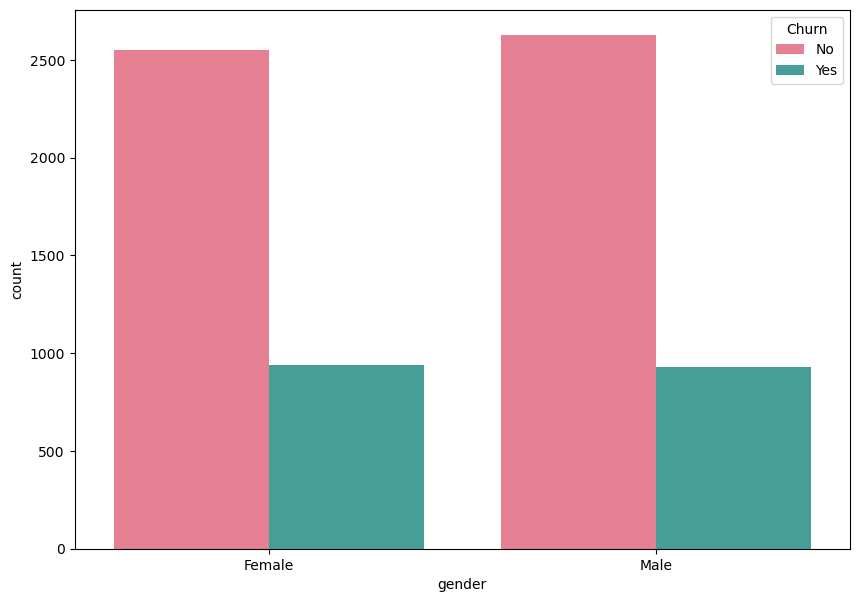

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender', hue='Churn', data=df, palette='husl')
plt.show()

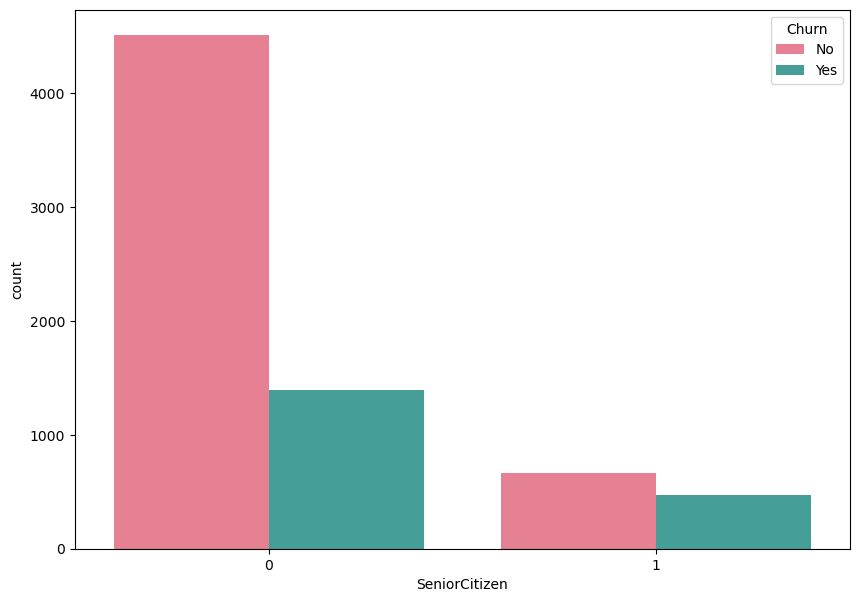

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='husl')
plt.show()

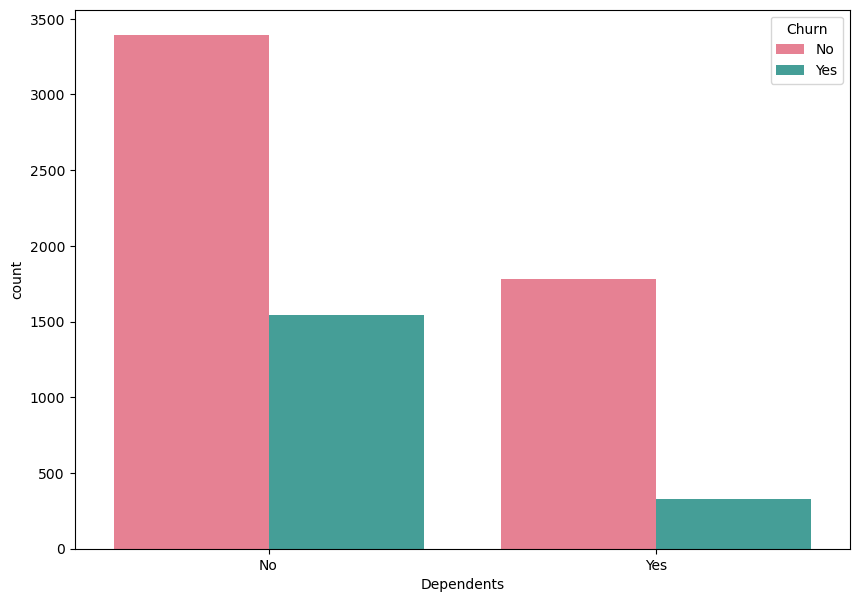

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='husl')
plt.show()

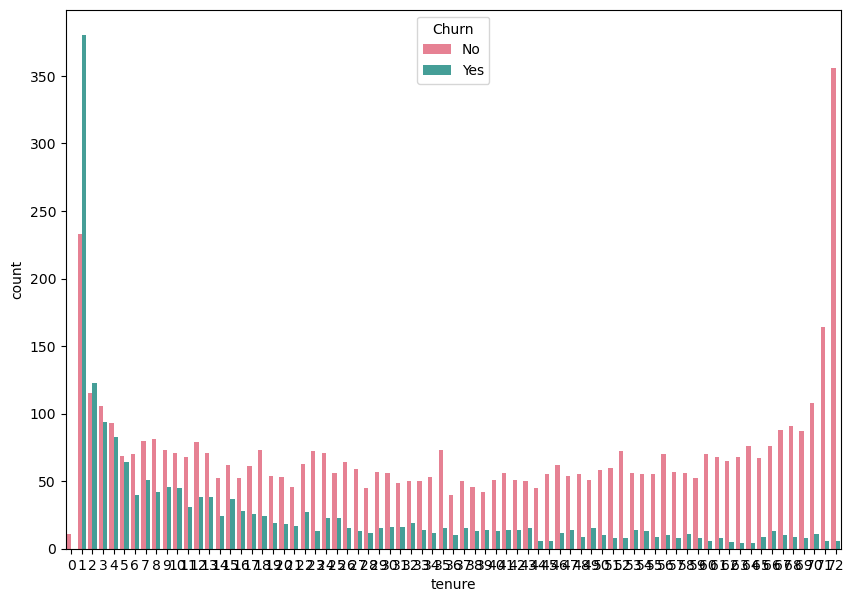

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x='tenure', hue='Churn', data=df, palette='husl')
plt.show()

<AxesSubplot:xlabel='InternetService', ylabel='count'>

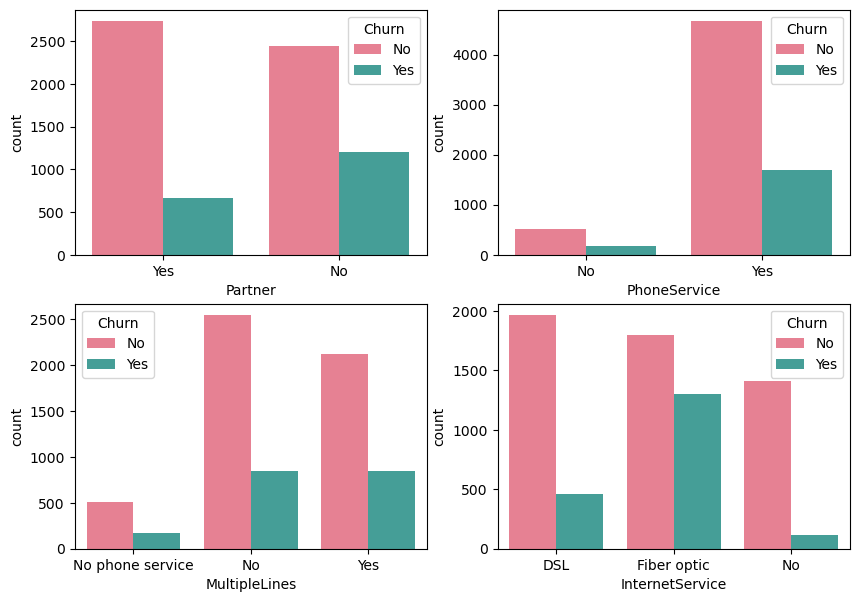

In [14]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Partner', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,2)
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,3)
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,4)
sns.countplot(x='InternetService', hue='Churn', data=df, palette='husl')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

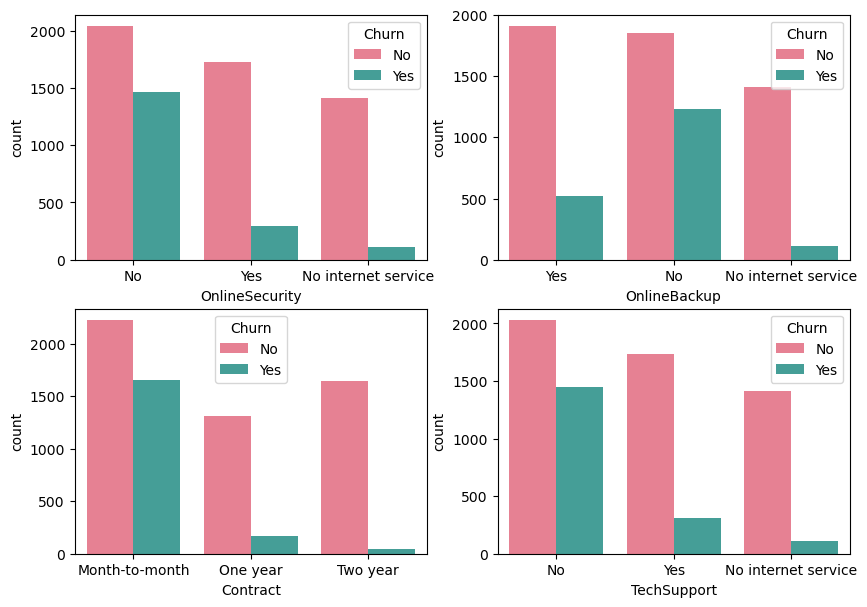

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,2)
sns.countplot(x='OnlineBackup', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,3)
sns.countplot(x='Contract', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,4)
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='husl')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

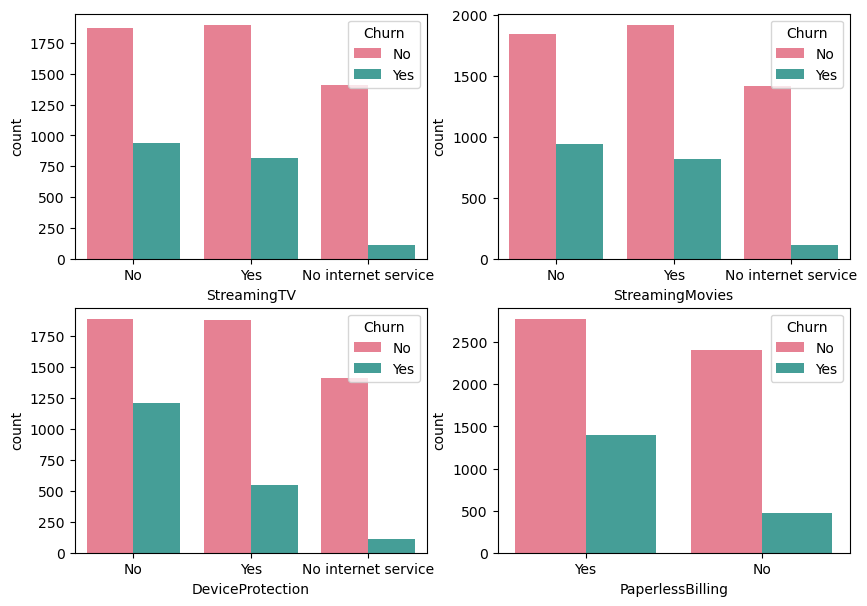

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,2)
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,3)
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='husl')
plt.subplot(2,2,4)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='husl')

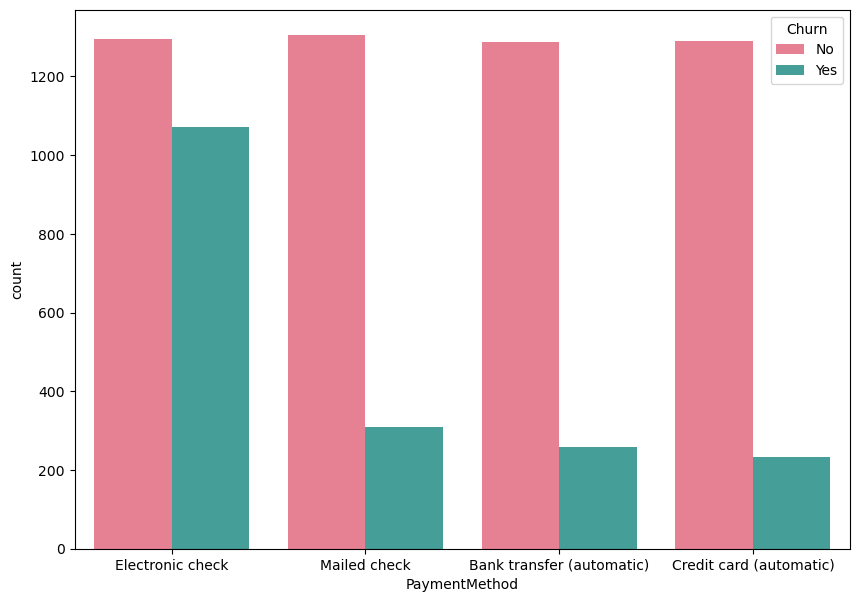

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='husl')
plt.show()

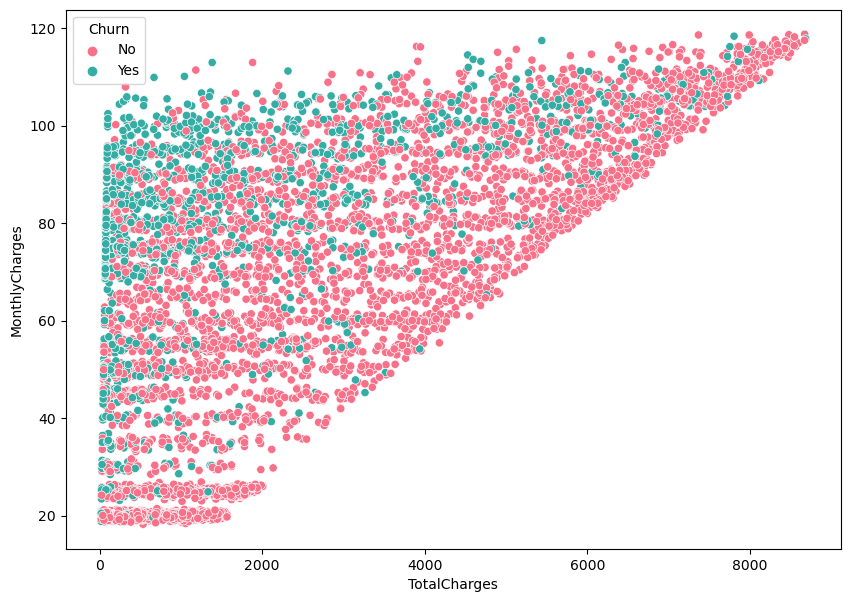

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges',hue='Churn', data=df, palette='husl')
plt.show()

## Data preprocessing

### Get data for model inference

In [19]:
data_inf = df.sample(21, random_state=21)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6091,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
745,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
5130,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
5616,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
6647,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
6924,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.50,Yes
1710,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
1658,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80,Yes
3614,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50,No


### Handling missing value

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
median = df['TotalCharges'].median()
df['TotalCharges'].fillna(median, inplace=True)

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Splitting between Features and Target

In [23]:
df = df.drop(columns=["customerID",'gender'])

In [24]:
X = df.drop(columns="Churn")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 18), (1409, 18), (5634,), (1409,))

### Handling outliers

In [25]:
def dignostic_plots(X_train, variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    sns.histplot(X_train[variable], bins=25)
    plt.title('Histogram')
    
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')
    
    plt.show()
    
    print('Skewness:', X_train[variable].skew())
    if (X_train[variable].skew() >= .5):
        print('The distribution is skewed')
    else:
        print('The distribution is normal')        

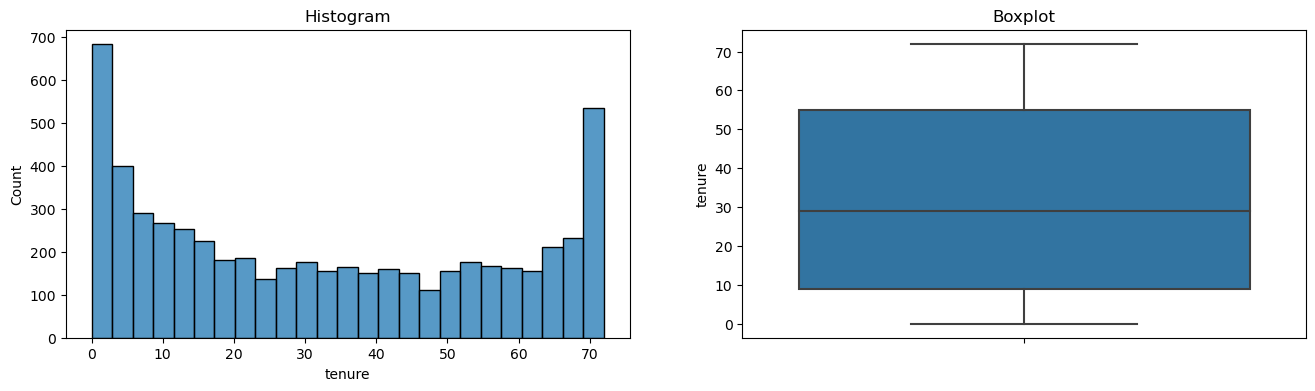

Skewness: 0.23736885061620938
The distribution is normal


In [26]:
dignostic_plots(X_train, 'tenure')

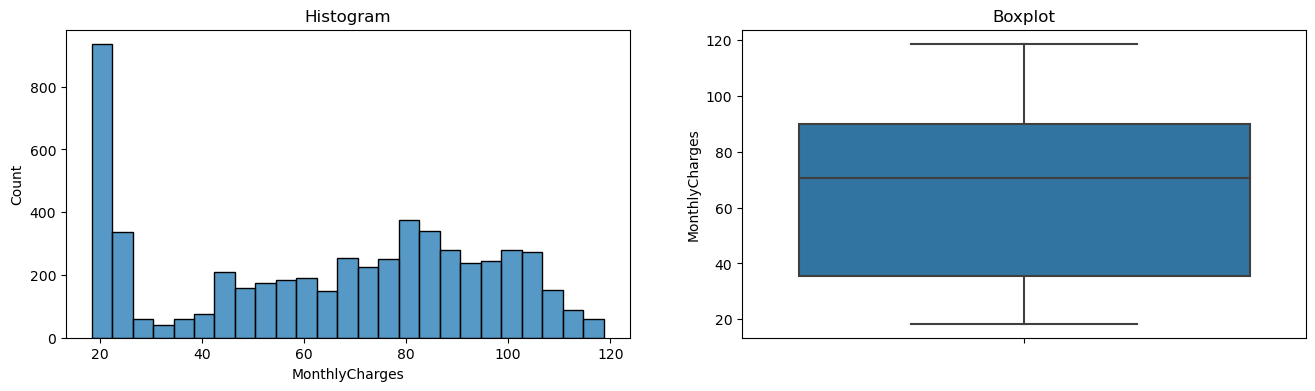

Skewness: -0.22436346665405302
The distribution is normal


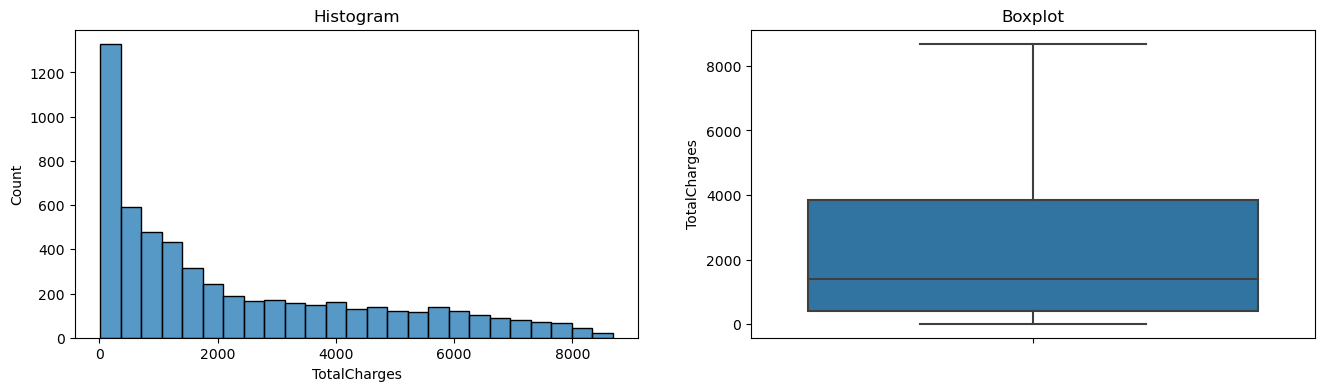

Skewness: 0.9494750398593487
The distribution is skewed


In [27]:
dignostic_plots(X_train, 'MonthlyCharges')
dignostic_plots(X_train, 'TotalCharges')

### Splitting between Numerical Columns and Categorical Columns

In [28]:
num_columns = ['MonthlyCharges', 'TotalCharges']
cat_columns = ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen']

### Feature Encoding

#### Target encoding 

In [29]:
labelencoder = LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [30]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [31]:
y_train_enc = labelencoder.transform(y_train)
y_test_enc = labelencoder.transform(y_test)

### Pipeline

In [32]:
num_skew = ['TotalCharges']
num_norm = ['MonthlyCharges']
cat_nom = ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
cat_none = ['tenure', 'SeniorCitizen']

In [33]:
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(), num_skew),
    ('numnom', StandardScaler(), num_norm),
    ('catord', OrdinalEncoder(), cat_nom),
    ('catnone', 'passthrough', cat_none)
])

In [34]:
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

In [35]:
import pickle
pickle.dump(preprocess, open('preprocess_pipe.pkl', 'wb'))

## Sequential API

### Model definition

In [36]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(16,)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam',
             metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [37]:
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train_enc.shape, y_val_enc.shape

((4507, 16), (1127, 16), (4507,), (1127,))

In [38]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_enc))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_enc))
test_dataset = test_dataset.batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_enc))
val_dataset = val_dataset.batch(64)

In [39]:
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20


71/71 [==============================] - 1s 4ms/step - loss: 0.7101 - accuracy: 0.5154 - val_loss: 0.5479 - val_accuracy: 0.7764
Epoch 2/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7517 - val_loss: 0.5128 - val_accuracy: 0.7764
Epoch 3/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7752 - val_loss: 0.4948 - val_accuracy: 0.7959
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7892 - val_loss: 0.4788 - val_accuracy: 0.8012
Epoch 5/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7939 - val_loss: 0.4655 - val_accuracy: 0.8021
Epoch 6/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7937 - val_loss: 0.4555 - val_accuracy: 0.7959
Epoch 7/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.7970 - val_loss: 0.4485 - val_accuracy: 0.7950
Epoch 8/20
71/71 [

### Model evaluation

In [40]:
df_history = pd.DataFrame(history.history)
df_history

,loss,accuracy,val_loss,val_accuracy
0,0.710127,0.515420,0.547864,0.776398
1,0.531497,0.751720,0.512827,0.776398
2,0.511340,0.775239,0.494802,0.795918
3,0.492447,0.789217,0.478762,0.801242
4,0.476443,0.793876,0.465454,0.802130
5,0.464163,0.793654,0.455490,0.795918
6,0.455400,0.796982,0.448532,0.795031
7,0.448911,0.798314,0.443449,0.795918
8,0.443629,0.801420,0.439711,0.795918
9,0.439503,0.801420,0.436683,0.795918


<AxesSubplot:>

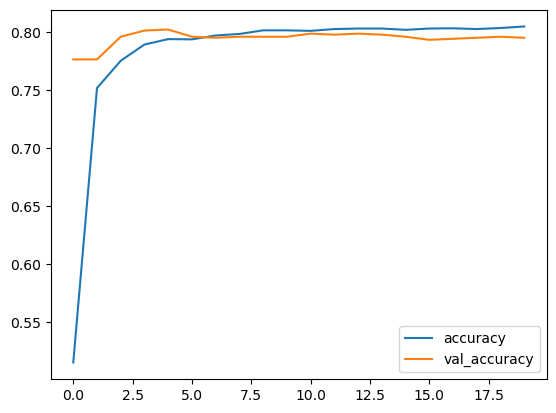

In [41]:
df_history[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

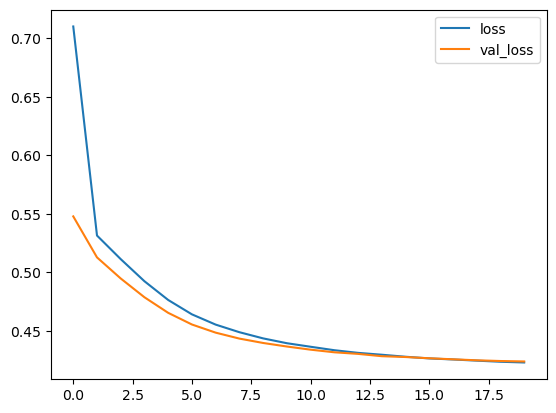

In [42]:
df_history[['loss', 'val_loss']].plot()

In [43]:
from sklearn.metrics import classification_report

In [45]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

classification_report(y_test_enc, y_pred)

45/45 [==============================] - 0s 1ms/step


'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.87      1035\n           1       0.64      0.55      0.59       374\n\n    accuracy                           0.80      1409\n   macro avg       0.74      0.72      0.73      1409\nweighted avg       0.79      0.80      0.79      1409\n'

### Model improvement

In [48]:
from keras.initializers import GlorotNormal
from keras.layers import BatchNormalization, Activation

In [56]:
model = Sequential()
model.add(Dense(32, input_shape=(16,), kernel_initializer=GlorotNormal(seed=40)))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(8))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(4))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Nadam',
              metrics='accuracy')

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_9 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_10 (Ba  (None, 8)                 32        
 tchNormalization)                                    

In [58]:
history_imp = model.fit(train_dataset, epochs=20, validation_data=val_dataset, verbose=1)

Epoch 1/20
71/71 [==============================] - 3s 5ms/step - loss: 0.8548 - accuracy: 0.5103 - val_loss: 1.0280 - val_accuracy: 0.4055
Epoch 2/20
71/71 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6814 - val_loss: 0.6456 - val_accuracy: 0.7090
Epoch 3/20
71/71 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.7737 - val_loss: 0.5940 - val_accuracy: 0.7959
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7930 - val_loss: 0.5619 - val_accuracy: 0.7995
Epoch 5/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7901 - val_loss: 0.5016 - val_accuracy: 0.7870
Epoch 6/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7888 - val_loss: 0.5272 - val_accuracy: 0.7480
Epoch 7/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.8005 - val_loss: 0.4627 - val_accuracy: 0.7915
Epoch 8/20
71/71 [==

In [59]:
df_history_imp = pd.DataFrame(history_imp.history)
df_history_imp

,loss,accuracy,val_loss,val_accuracy
0,0.854791,0.510317,1.028042,0.405501
1,0.688499,0.681385,0.645639,0.708962
2,0.620940,0.773685,0.593997,0.795918
3,0.578503,0.792989,0.561893,0.799468
4,0.550086,0.790104,0.501568,0.787045
5,0.508254,0.788773,0.527182,0.748004
6,0.472055,0.800533,0.462659,0.791482
7,0.453334,0.793211,0.457185,0.802130
8,0.438073,0.799867,0.444493,0.812777
9,0.434070,0.799645,0.429724,0.810115


<AxesSubplot:>

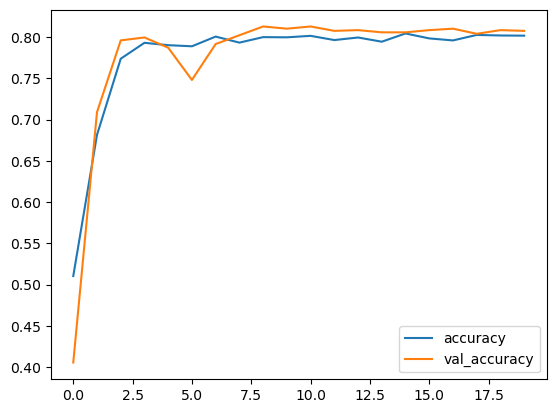

In [60]:
df_history_imp[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

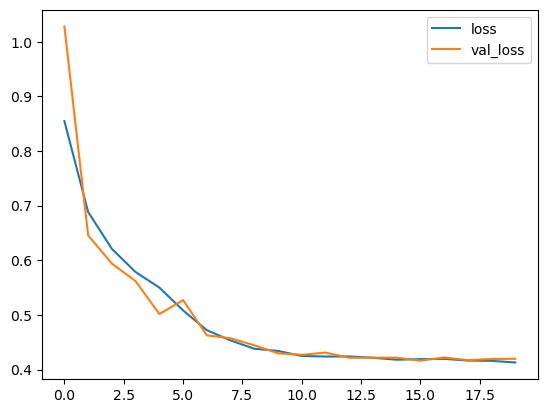

In [61]:
df_history_imp[['loss', 'val_loss']].plot()

In [63]:
y_pred_imp = model.predict(X_test)
y_pred_imp = np.where(y_pred_imp >= .5, 1,0)

print(classification_report(y_test_enc, y_pred_imp))

45/45 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## Model Inference

In [105]:
data_inf.reset_index(inplace=True)

In [106]:
data_inf_scaled = preprocess.transform(data_inf)

In [107]:
y_pred_inf = model.predict(data_inf_scaled)
y_pred_inf = np.where(y_pred_inf > .5,1,0)

1/1 [==============================] - 0s 22ms/step


In [108]:
y_pred_inf_final = labelencoder.inverse_transform(y_pred_inf)
len(y_pred_inf_final)

21

In [109]:
y_inf_pred_final = pd.DataFrame(y_pred_inf_final, columns=['func'])

df_inf_func = pd.concat([data_inf, y_inf_pred_final], axis=1)
df_inf_func

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,func
0,6091,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,...,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes,Yes
1,745,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No,No
2,5130,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes,No
3,5616,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,...,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No,No
4,6647,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,...,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No,No
5,6924,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes,Yes
6,6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,...,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.50,Yes,No
7,1710,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,...,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No,Yes
8,1658,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80,Yes,No
9,3614,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50,No,No
